<a href="https://colab.research.google.com/github/codingnest/MeterReading/blob/hrishi/YOLO_retrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install Cython

In [0]:
!git clone https://github.com/thtrieu/darkflow.git && cd darkflow

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 32.98 MiB | 47.96 MiB/s, done.
Resolving deltas: 100% (1760/1760), done.


In [0]:
!pip install opencv-python==3.3.0.10

     |████████████████████████████████| 15.5MB 3.4MB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.3.0.10 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


In [0]:
import cv2
cv2.__version__

'3.3.0'

In [0]:
!pwd

/content


In [0]:
cd darkflow

/content/darkflow


In [0]:
!python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [0]:
!pip install .

Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=831105 sha256=fa70ce3bcd4e46047ad73d9f2cfd17c441c406c8235ea1281962878743795e67
  Stored in directory: /tmp/pip-ephem-wheel-cache-my6__j94/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2


W0826 04:00:06.258592 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0826 04:00:06.260139 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0826 04:00:06.261867 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0826 04:00:06.264041 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0826 04:00:06.264961 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/buil

In [0]:
options = {"model": "cfg/yolo.cfg", "load": "/content/drive/My Drive/ColabFolders/yolo.weights", "threshold": 0.1, "gpu": 1.0}


In [0]:
tfnet = TFNet(options)

In [0]:
tfnet = TFNet(options)

W0825 11:07:23.188132 140592887596928 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:105: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 11:07:23.192347 140592887596928 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:70: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0825 11:07:23.193755 140592887596928 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:71: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0825 11:07:23.205597 140592887596928 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:84: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 11:07:23.259651 140592887596928 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/simple.py:106: The name tf.nn.max_pool is de

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading /content/drive/My Drive/ColabFolders/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.0461726188659668s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     |

W0825 11:07:26.239845 140592887596928 deprecation.py:506] From /content/darkflow/darkflow/net/ops/convolution.py:28: calling extract_image_patches (from tensorflow.python.ops.array_ops) with ksizes is deprecated and will be removed in a future version.
Instructions for updating:
ksizes is deprecated, use sizes instead


 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | concat [16]                      | (?, 38, 38, 512)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 64)
 Load  |  Yep!  | local flatten 2x2                | (?, 19, 19, 256)
 Load  |  Yep!  | concat [27, 24]                  | (?, 19, 19, 1280)


W0825 11:07:27.134812 140592887596928 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:132: The name tf.GPUOptions is deprecated. Please use tf.compat.v1.GPUOptions instead.



 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | conv 1x1p0_1    linear           | (?, 19, 19, 425)
-------+--------+----------------------------------+---------------
GPU mode with 1.0 usage
Finished in 6.162893533706665s



In [0]:
import pprint as pp

original_img = cv2.imread("/content/darkflow/sample_img/sample_horses.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)

pp.pprint(results)

[{'bottomright': {'x': 457, 'y': 257},
  'confidence': 0.12218201,
  'label': 'horse',
  'topleft': {'x': 391, 'y': 208}},
 {'bottomright': {'x': 149, 'y': 340},
  'confidence': 0.49875456,
  'label': 'horse',
  'topleft': {'x': 4, 'y': 175}},
 {'bottomright': {'x': 451, 'y': 317},
  'confidence': 0.35554513,
  'label': 'horse',
  'topleft': {'x': 321, 'y': 201}},
 {'bottomright': {'x': 433, 'y': 370},
  'confidence': 0.7830669,
  'label': 'horse',
  'topleft': {'x': 245, 'y': 197}},
 {'bottomright': {'x': 599, 'y': 350},
  'confidence': 0.8938943,
  'label': 'horse',
  'topleft': {'x': 433, 'y': 210}},
 {'bottomright': {'x': 310, 'y': 411},
  'confidence': 0.85441643,
  'label': 'horse',
  'topleft': {'x': 0, 'y': 192}}]


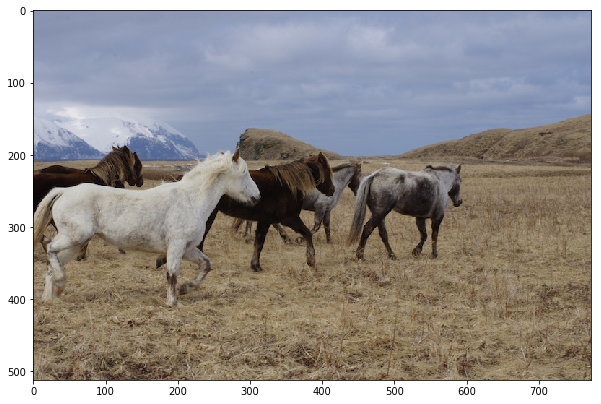

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

In [0]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

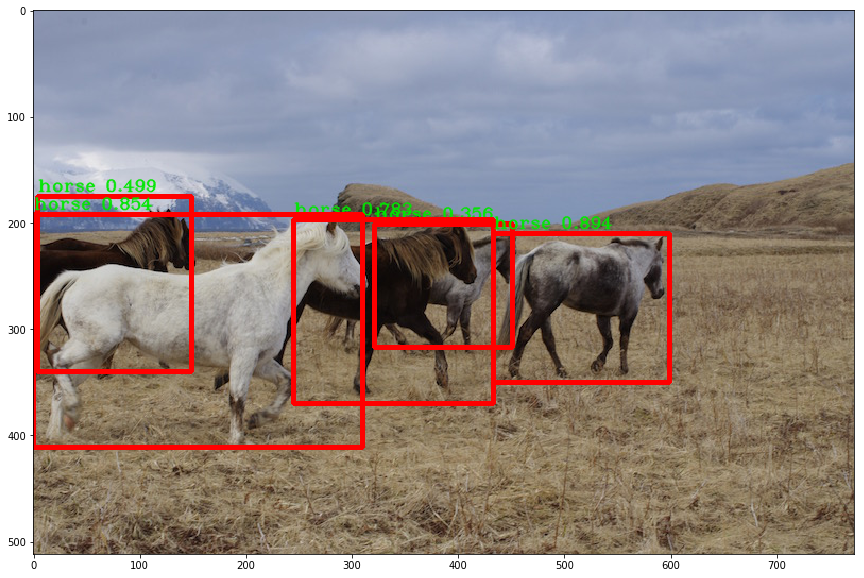

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

Upload Config file for custom model

In [0]:
# for retrain

options = {"model": "/content/darkflow/cfg/yolo_custom.cfg", 
           "load": "/content/drive/My Drive/ColabFolders/yolo.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/drive/My Drive/ColabFolders/annotations",
           "dataset": "/content/drive/My Drive/ColabFolders/images"}

## Edit Labels file
edit and upload labels file 

In [0]:
mv /content/labels.txt /content/darkflow/

In [0]:
mv /content/yolo_custom.cfg /content/darkflow/cfg/

In [0]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing /content/darkflow/cfg/yolo_custom.cfg
Loading /content/drive/My Drive/ColabFolders/yolo.weights ...


W0826 04:03:46.909557 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:105: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 04:03:46.920604 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:70: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0826 04:03:46.921723 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:71: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0826 04:03:46.934364 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:84: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0826 04:03:46.992821 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/simple.py:106: The name tf.nn.max_pool is de

Successfully identified 203934260 bytes
Finished in 0.5302743911743164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128

W0826 04:03:50.822147 139721477195648 deprecation.py:506] From /content/darkflow/darkflow/net/ops/convolution.py:28: calling extract_image_patches (from tensorflow.python.ops.array_ops) with ksizes is deprecated and will be removed in a future version.
Instructions for updating:
ksizes is deprecated, use sizes instead


 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Load  |  Yep!  | concat [16]                      | (?, 38, 38, 512)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 64)
 Load  |  Yep!  | local flatten 2x2                | (?, 19, 19, 256)
 Load  |  Yep!  | concat [27, 24]                  | (?, 19, 19, 1280)


W0826 04:03:51.558845 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:132: The name tf.GPUOptions is deprecated. Please use tf.compat.v1.GPUOptions instead.

W0826 04:03:51.616851 139721477195648 deprecation.py:323] From /content/darkflow/darkflow/net/yolov2/train.py:87: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 19, 19, 1024)
 Init  |  Yep!  | conv 1x1p0_1    linear           | (?, 19, 19, 75)
-------+--------+----------------------------------+---------------
GPU mode with 1.0 usage
/content/darkflow/cfg/yolo_custom.cfg loss hyper-parameters:
	H       = 19
	W       = 19
	box     = 5
	classes = 10
	scales  = [1.0, 5.0, 1.0, 1.0]


W0826 04:03:51.810609 139721477195648 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/yolov2/train.py:107: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0826 04:03:51.885177 139721477195648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Building /content/darkflow/cfg/yolo_custom.cfg loss
Building /content/darkflow/cfg/yolo_custom.cfg train op


W0826 04:03:53.623732 139721477195648 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Finished in 13.848290920257568s



In [0]:
!pwd

/content/darkflow


In [0]:
!mkdir ckpt

## Train Model

In [0]:
tfnet.train()


/content/darkflow/cfg/yolo_custom.cfg parsing /content/drive/My Drive/ColabFolders/annotations
Parsing for ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 
[====================>]100%  WH1_Meter_Rdg_20190718080000.xml
Statistics:
1: 9
6: 10
5: 10
7: 9
2: 7
3: 2
8: 4
0: 2
9: 6
4: 1
Dataset size: 20
Dataset of 20 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 8
	Epoch number  : 50
	Backup every  : 2000
step 1 - loss 131.929931640625 - moving ave loss 131.929931640625
step 2 - loss 132.62673950195312 - moving ave loss 131.9996124267578
Finish 1 epoch(es)
step 3 - loss 129.7046356201172 - moving ave loss 131.77011474609375
step 4 - loss 129.47564697265625 - moving ave loss 131.54066796875
Finish 2 epoch(es)
step 5 - loss 128.5054473876953 - moving ave loss 131.23714591064453
step 6 - loss 127.19427490234375 - moving ave loss 130.83285880981444
Finish 3 epoch(es)
step 7 - loss 125.6507568359375 - moving ave loss 130.31464861242677
step 8 - loss 124.32191467285

In [0]:
!pwd

/content/darkflow


In [0]:
!cp /content/darkflow/ckpt /content/drive/My Drive/ColabFolders

cp: target 'Drive/ColabFolders' is not a directory
